In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
path = './retirement_prediction.csv'
df = pd.read_csv(path)

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


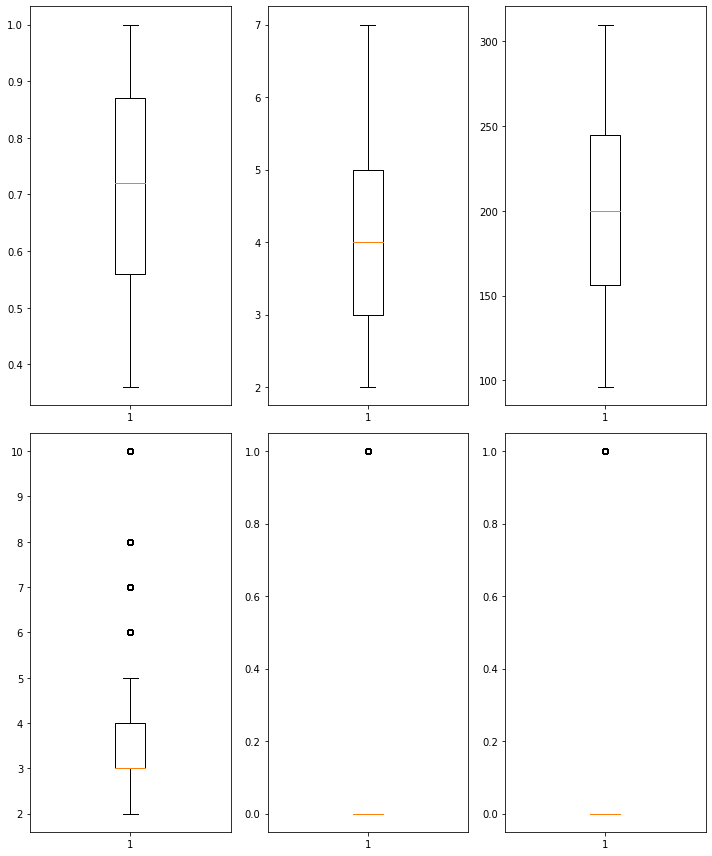

In [5]:
# satisfaction_level 변수를 제외하고 나머지 독립변수 8개를 한번에 확인하기

# 도화지를 그린다
fig = plt.figure(figsize=(10, 12))

# 기본 도화지 위에 세부 도화지를 세팅한다
# 행렬의 개념으로 가로 2줄(행) 세로 3줄(열)로 세팅한다, 그리고 이 도화지가 몇번째 위치할지 정해준다.
# add_subplot(행, 열, 위치)
x1 = fig.add_subplot(2,3,1)
x2 = fig.add_subplot(2,3,2)
x3 = fig.add_subplot(2,3,3)
x4 = fig.add_subplot(2,3,4)
x5 = fig.add_subplot(2,3,5)
x6 = fig.add_subplot(2,3,6)

# 각 도화지에 bboxplot 그려준다
x1.boxplot(df['last_evaluation'])
x2.boxplot(df['number_project'])
x3.boxplot(df['average_montly_hours'])
x4.boxplot(df['time_spend_company'])
x5.boxplot(df['Work_accident'])
x6.boxplot(df['promotion_last_5years'])

plt.tight_layout()
plt.show()

In [6]:
df.shape

(14999, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.describe(include='O')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [11]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [12]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

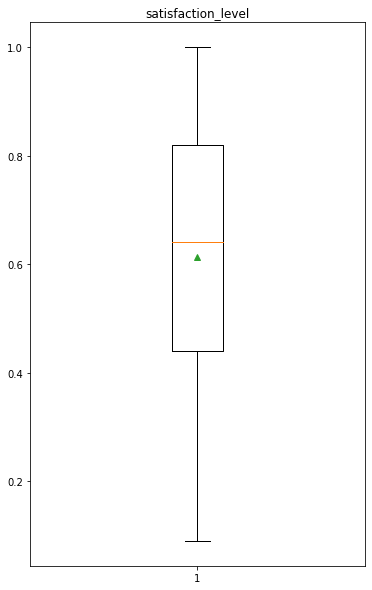

In [13]:
plt.figure(figsize=(6,10))
plt.boxplot(df['satisfaction_level'].values, showmeans=True)
plt.title('satisfaction_level')
plt.show()

In [14]:
df[['department', 'salary']]

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [15]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [3]:
encoding_map = {'low':0,
                'medium':1,
                'high':2}

df['salary'] = df['salary'].map(encoding_map)

df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['department'])
encoding_class = encoder.transform(df['department'])
encoding_class

array([7, 7, 7, ..., 8, 8, 8])

In [5]:
df['department'] = encoder.transform(df['department'])

In [19]:
df['department'].value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: department, dtype: int64

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0


In [6]:
x_data = df.drop('left', axis=1, inplace=False)
x_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,1
3,0.72,0.87,5,223,5,0,0,7,0
4,0.37,0.52,2,159,3,0,0,7,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,0
14995,0.37,0.48,2,160,3,0,0,8,0
14996,0.37,0.53,2,143,3,0,0,8,0
14997,0.11,0.96,6,280,4,0,0,8,0


In [7]:
y_data = df['left']
y_data

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [23]:
from statsmodels.formula.api import ols

In [30]:
import statsmodels.api as sm

ols_x_data = sm.add_constant(x_data, has_constant = 'add')
ols_model = sm.OLS(y_data, ols_x_data).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     449.9
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:16:41   Log-Likelihood:                -6687.2
No. Observations:               14999   AIC:                         1.339e+04
Df Residuals:                   14989   BIC:                         1.347e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5012      0.020     25.484      0.000       0.463       0.540
satisfaction_level       -0.6460      0.013    -50.378      0.000      -0.671      -0.621
last_evaluation           0.0893      0.020      4.447      0.000       0.050       0.129
number_project           -0.0344      0.003    -11.823      0.000      -0.040      -0.029
average_montly_hours      0.0006   6.99e-05      9.224      0.000       0.001       0.001
time_spend_company        0.0357      0.002     16.365      0.000       0.031       0.040
Work_accident            -0.1567      0.009    -17.809      0.000      -0.174      -0.139
promotion_last_5years    -0.1210      0.022     -5.607      0.000      -0.163      -0.079
department                0.0043      0.001      4.026      0.000       0.002       0.006
salary                   -0.0923      0.005    -18.893      0.000      -0.102      -0.083
==============================================================================
Omnibus:                     1318.327   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1590.138
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                       2.640   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# 로지스틱 회귀 분석

# 로지스틱 회귀 모델에서 b0를 위해 상수항을 추가한다.
add_x_data = sm.add_constant(x_data, has_constant='add')

# 로지스틱 모델에 데이터를 넣어주고 학습시킨다.
# sm.Logit(종속변수,독립변수).fit()
# 이번 모델에서 특별히 파라미터 중 다변수함수에 뉴턴방법을 적용한다.
logit_model = sm.Logit(y_data, add_x_data).fit(method='newton')

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.431309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14989
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2142
Time:                        08:55:14   Log-Likelihood:                -6469.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3209      0.128      2.512      0.012       0.071       0.571
satisfaction_level       -4.1307      0.098    -42.303      0.000      -4.322      -3.939
last_evaluation           0.7265      0.148      4.893      0.000       0.435       1.017
number_project           -0.3124      0.021    -14.755      0.000      -0.354      -0.271
average_montly_hours      0.0044      0.001      8.663      0.000       0.003       0.005
time_spend_company        0.2576      0.015     16.877      0.000       0.228       0.287
Work_accident            -1.5384      0.089    -17.193      0.000      -1.714      -1.363
promotion_last_5years    -1.5032      0.256     -5.862      0.000      -2.006      -1.001
department                0.0303      0.008      3.904      0.000       0.015       0.046
salary                   -0.6992      0.038    -18.471      0.000      -0.773      -0.625
=========================================================================================
"""

In [11]:
logit_model.params

const                    0.320936
satisfaction_level      -4.130741
last_evaluation          0.726457
number_project          -0.312417
average_montly_hours     0.004449
time_spend_company       0.257564
Work_accident           -1.538436
promotion_last_5years   -1.503198
department               0.030340
salary                  -0.699206
dtype: float64

In [12]:
np.exp(logit_model.params)

const                    1.378418
satisfaction_level       0.016071
last_evaluation          2.067742
number_project           0.731677
average_montly_hours     1.004459
time_spend_company       1.293774
Work_accident            0.214717
promotion_last_5years    0.222418
department               1.030805
salary                   0.496980
dtype: float64

In [10]:
# 상수항 추가
add_x_data = sm.add_constant(x_data, has_constant = 'add')

# GLM 모델 생성
# 만약 종속변수의 분포가 감마분포인 경우
glm_model = sm.GLM(y_data, add_x_data, family=sm.families.Gamma(link=sm.families.links.log))
glm_model_result = glm_model.fit()

# GLM 모델 출력
print(glm_model_result.summary())

C:\Users\USER\.conda\envs\data_env_tf2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                14999
Model:                            GLM   Df Residuals:                    14989
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                          17.832
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 06 Sep 2021   Deviance:                   8.2011e+05
Time:                        08:54:08   Pearson chi2:                 2.67e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.58

C:\Users\USER\.conda\envs\data_env_tf2\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [8]:
x_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,1
3,0.72,0.87,5,223,5,0,0,7,0
4,0.37,0.52,2,159,3,0,0,7,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,0
14995,0.37,0.48,2,160,3,0,0,8,0
14996,0.37,0.53,2,143,3,0,0,8,0
14997,0.11,0.96,6,280,4,0,0,8,0


In [9]:
x_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler

# scaler 객체 생성
scaler = MinMaxScaler()

# scale 할 데이터 적합(fit) 시켜주기
# 전체 독립변수를 다 넣는 경우가 많습니다.
# 우리 데이터 중 0~1로 잘 돼 있는 데이터는 빼고 진행해보겠습니다.
# 그럼 각 변수마다 알아서 진행해줍니다.
scaler.fit(x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']])

norm_x_data = x_data

# normalization 진행
norm_x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']]\
     = scaler.transform(x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']])

norm_x_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,0.0,0.285047,0.125,0,0,0.777778,0
1,0.80,0.86,0.6,0.775701,0.500,0,0,0.777778,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,0.777778,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,0.777778,0
4,0.37,0.52,0.0,0.294393,0.125,0,0,0.777778,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0.0,0.257009,0.125,0,0,0.888889,0
14995,0.37,0.48,0.0,0.299065,0.125,0,0,0.888889,0
14996,0.37,0.53,0.0,0.219626,0.125,0,0,0.888889,0
14997,0.11,0.96,0.8,0.859813,0.250,0,0,0.888889,0


In [14]:
norm_x_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,0.360611,0.490889,0.187279,0.144610,0.021268,0.652281,0.594706
std,0.248631,0.171169,0.246518,0.233379,0.182517,0.351719,0.144281,0.318754,0.637183
min,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,0.200000,0.280374,0.125000,0.000000,0.000000,0.444444,0.000000
50%,0.640000,0.720000,0.400000,0.485981,0.125000,0.000000,0.000000,0.777778,1.000000
75%,0.820000,0.870000,0.600000,0.696262,0.250000,0.000000,0.000000,0.888889,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
# 라이브러리
from sklearn.preprocessing import StandardScaler

# 기존 데이터를 norm_x_data로 새로 정의
norm_x_data = x_data

# sclaer 생성
scaler = StandardScaler()

# scaler 적합
scaler.fit(norm_x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']])

# 정규화(Normalization) 진행
norm_x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']] = \
scaler.transform(norm_x_data[['number_project', 'average_montly_hours', 'time_spend_company', 'department']])

# 정규화 데이터 확인
norm_x_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,0,0.393725,0
1,0.80,0.86,0.971113,1.220423,1.713436,0,0,0.393725,1
2,0.11,0.88,2.593763,1.420657,0.343655,0,0,0.393725,1
3,0.72,0.87,0.971113,0.439508,1.028546,0,0,0.393725,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,0,0.393725,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,-1.462863,-1.002181,-0.341235,0,0,0.742316,0
14995,0.37,0.48,-1.462863,-0.821970,-0.341235,0,0,0.742316,0
14996,0.37,0.53,-1.462863,-1.162368,-0.341235,0,0,0.742316,0
14997,0.11,0.96,1.782438,1.580845,0.343655,0,0,0.742316,0


In [9]:
from sklearn.model_selection import train_test_split
norm_x_train, norm_x_test, y_train, y_test \
= train_test_split(norm_x_data, y_data, stratify=y_data, test_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(norm_x_train, y_train)
print('Train Accuracy :', logit_model.score(norm_x_train, y_train))
print('Test Accuracy :', logit_model.score(norm_x_test, y_test))

Train Accuracy : 0.7862653586055814
Test Accuracy : 0.7831111111111111


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

# 적합을 시켜야겠죠
knn.fit(norm_x_train, y_train)

# 정확도를 확인해보겠습니다.
print('Train Accuracy :', knn.score(norm_x_train, y_train))
print('Test Accuracy :', knn.score(norm_x_test, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9688888888888889
